# LSTM

Make a multivariate forecast using a LSTM network on BTC price data. The data is on minute intervals. This network is trained on two inputs: 
1. average high and low price for every minute 
2. the volume to produce the forecast.

- Name: Abhishek Aditya BS
- SRN: PES1UG19CS019
- VI Semester 'A' section

# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Convert the data to a dataframe

In [2]:
stock_data = pd.read_csv("/content/BTC_sm_nc.csv")
stock_data.head()

,time,close,high,low,open,volume
0,1483228740000000000,968.29,968.29,968.29,968.29,0
1,1483228800000000000,968.70,968.76,968.49,968.29,12993
2,1483228860000000000,968.43,968.70,967.20,968.70,73800
3,1483228920000000000,967.21,968.00,967.21,968.43,3500
4,1483228980000000000,966.97,967.21,966.74,967.21,15969


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    100 non-null    int64  
 1   close   100 non-null    float64
 2   high    100 non-null    float64
 3   low     100 non-null    float64
 4   open    100 non-null    float64
 5   volume  100 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


In [4]:
import math
stock_data["average"] = (stock_data["high"] + stock_data["low"])/2
input_feature= stock_data.iloc[:,[2,6]].values
input_data = input_feature
input_data[0:2]

array([[968.29 , 968.29 ],
       [968.76 , 968.625]])

# Visualize the dataset

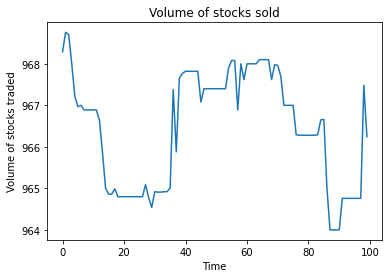

In [5]:
plt.plot(input_feature[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time")
plt.ylabel("Volume of stocks traded")
plt.show()

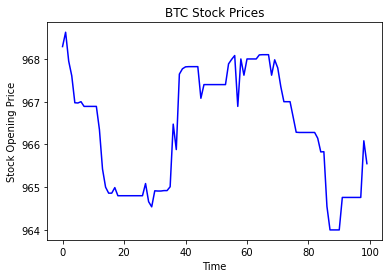

In [6]:
plt.plot(input_feature[:,1], color='blue')
plt.title("BTC Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Opening Price")
plt.show()

# Preprocess the dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

### Loop through all the samples and for each day we go back 10 minutes in the past and add the volume of the stocks traded an average stock price.

In [8]:
lookback= 10

test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [9]:
print("test_size")
print(test_size)
print("length of stock_data")
print(len(stock_data))
print("length of X")
print(len(X))
print("first 5 points of y")
print(y[0:5])
print("points 10-15 of input_data")
print(input_data[10:15,1])

test_size
30
length of stock_data
100
length of X
89
first 5 points of y
[0.6248648648648611, 0.6248648648648611, 0.5070270270270214, 0.30810810810808675, 0.21621621621622467]
points 10-15 of input_data
[0.62486486 0.62486486 0.50702703 0.30810811 0.21621622]


In [10]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)
print(X[1])

(89, 10, 2)
(40, 10, 2)
[[1.         1.        ]
 [0.98739496 0.85405405]
 [0.84033613 0.77945946]
 [0.67436975 0.64324324]
 [0.62394958 0.64216216]
 [0.6302521  0.64864865]
 [0.60714286 0.62486486]
 [0.60714286 0.62486486]
 [0.60714286 0.62486486]
 [0.60714286 0.62486486]]


# Build the LSTM Model using Keras

In [11]:
from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 30)            3960      
                                                                 
 lstm_1 (LSTM)               (None, 10, 30)            7320      
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
9/9 [==============================] - 6s 14ms/step - loss: 0.2498
Epoch 2/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0727
Epoch 3/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0675
Epoch 4/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0560
Epoch 5/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0525
Epoch 6/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0501
Epoch 7/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0485
Epoch 8/200
9/9 [==============================] - 0s 16ms/step - loss: 0.0464
Epoch 9/200
9/9 [==============================] - 0s 16ms/step - loss: 0.0450
Epoch 10/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0437
Epoch 11/200
9/9 [==============================] - 0s 15ms/step - loss: 0.0426
Epoch 12/200
9/9 [==============================] - 0s 14ms/step - loss: 0.0416
Epoch 13/200
9/9 [==============================]

# Visualizing the predictions

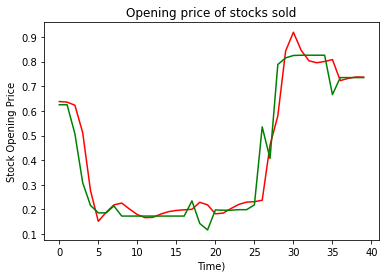

In [14]:
predicted_value= model.predict(X_test)

plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time)")
plt.ylabel("Stock Opening Price")
plt.show()